In [550]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn import metrics

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import re
import locale

In [551]:
data_famous = pd.read_csv('Main_data.csv',index_col = 0)
############Lecture de ma dataset#########################""

In [377]:
                    #############Preprocessing###########################""""""

In [378]:
data_famous.head()

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,cheveaux,Kilometrage,Etat,Secteur
0,127000 DH,Dacia Duster,Fès,Diesel,6 CV,Manuelle,2017,130 000 - 139 999,Excellent
1,NaN,Peugeot 207,El Jadida,Diesel,7 CV,Manuelle,2009,180 000 - 189 999,Excellent
2,NaN,Opel insignia,Fès,Diesel,8 CV,Manuelle,150 000 - 159 999,Très bon,Narjis
3,NaN,Porsche Cayenne Diesel,Casablanca,Diesel,12 CV,Automatique,2016,70 000 - 74 999,Oasis
4,36000 DH,Peugeot 306,Agadir,Diesel,8 CV,Manuelle,1998,250 000 - 299 999,Très bon


In [379]:
data_famous.isnull().sum()

Prices               10907
Modeles                  0
Villes                   3
Diesel/Essence           0
Puissance fiscale        0
cheveaux                 0
Kilometrage             55
Etat                    28
Secteur                  9
dtype: int64

In [380]:
data_famous_work = pd.DataFrame(data_famous)

In [381]:
data_famous_work ['Prices'] = data_famous_work['Prices'].replace({'\DH': '', ',': ''}, regex=True).astype(float)
##########une expression reguliere pour enlever le signe DH des prix####################

In [382]:
data_famous_work.head()

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,cheveaux,Kilometrage,Etat,Secteur
0,127000.0,Dacia Duster,Fès,Diesel,6 CV,Manuelle,2017,130 000 - 139 999,Excellent
1,NaN,Peugeot 207,El Jadida,Diesel,7 CV,Manuelle,2009,180 000 - 189 999,Excellent
2,NaN,Opel insignia,Fès,Diesel,8 CV,Manuelle,150 000 - 159 999,Très bon,Narjis
3,NaN,Porsche Cayenne Diesel,Casablanca,Diesel,12 CV,Automatique,2016,70 000 - 74 999,Oasis
4,36000.0,Peugeot 306,Agadir,Diesel,8 CV,Manuelle,1998,250 000 - 299 999,Très bon


In [383]:
mean_value=data_famous_work['Prices'].mean()
data_famous_work['Prices'].fillna(value=mean_value, inplace=True)
#####################Remplacer les valeurs nulles des prix par la moyenne de la colonne###################

In [384]:
data_famous_work.head()

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,cheveaux,Kilometrage,Etat,Secteur
0,127000.000000,Dacia Duster,Fès,Diesel,6 CV,Manuelle,2017,130 000 - 139 999,Excellent
1,133845.092864,Peugeot 207,El Jadida,Diesel,7 CV,Manuelle,2009,180 000 - 189 999,Excellent
2,133845.092864,Opel insignia,Fès,Diesel,8 CV,Manuelle,150 000 - 159 999,Très bon,Narjis
3,133845.092864,Porsche Cayenne Diesel,Casablanca,Diesel,12 CV,Automatique,2016,70 000 - 74 999,Oasis
4,36000.000000,Peugeot 306,Agadir,Diesel,8 CV,Manuelle,1998,250 000 - 299 999,Très bon


In [385]:
import math

In [386]:
data_famous_work['Prices'] = data_famous_work['Prices'].astype('int')
##################################j'ai changé le tye pour faire disparaitre les virgules dans les prices#############

In [387]:
data_famous_work.head(10)

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,cheveaux,Kilometrage,Etat,Secteur
0,127000,Dacia Duster,Fès,Diesel,6 CV,Manuelle,2017,130 000 - 139 999,Excellent
1,133845,Peugeot 207,El Jadida,Diesel,7 CV,Manuelle,2009,180 000 - 189 999,Excellent
2,133845,Opel insignia,Fès,Diesel,8 CV,Manuelle,150 000 - 159 999,Très bon,Narjis
3,133845,Porsche Cayenne Diesel,Casablanca,Diesel,12 CV,Automatique,2016,70 000 - 74 999,Oasis
4,36000,Peugeot 306,Agadir,Diesel,8 CV,Manuelle,1998,250 000 - 299 999,Très bon
5,65000,Chevrolet spark,Fès,Essence,6 CV,Manuelle,100 000 - 109 999,Très bon,Narjis
6,133845,Bmw 640d Grand Coupé,Casablanca,Diesel,12 CV,Automatique,2013,150 000 - 159 999,Oasis
7,71000,peugeot 308,Casablanca,Diesel,6 CV,Manuelle,2009,200 000 - 249 999,Très bon
8,133845,Peugeot 406,Ksar el-Kebir,Diesel,8 CV,--,2001,250 000 - 299 999,Toute la ville
9,35000,Fiat Palio,Sefrou,Diesel,--,--,2001,120 000 - 129 999,Toute la ville


In [388]:
data_famous.isnull().sum()

Prices                0
Modeles               0
Villes                3
Diesel/Essence        0
Puissance fiscale     0
cheveaux              0
Kilometrage          55
Etat                 28
Secteur               9
dtype: int64

In [389]:
data_famous_work

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,cheveaux,Kilometrage,Etat,Secteur
0,127000,Dacia Duster,Fès,Diesel,6 CV,Manuelle,2017,130 000 - 139 999,Excellent
1,133845,Peugeot 207,El Jadida,Diesel,7 CV,Manuelle,2009,180 000 - 189 999,Excellent
2,133845,Opel insignia,Fès,Diesel,8 CV,Manuelle,150 000 - 159 999,Très bon,Narjis
3,133845,Porsche Cayenne Diesel,Casablanca,Diesel,12 CV,Automatique,2016,70 000 - 74 999,Oasis
4,36000,Peugeot 306,Agadir,Diesel,8 CV,Manuelle,1998,250 000 - 299 999,Très bon
...,...,...,...,...,...,...,...,...,...
1745,125000,Mercedes 220,Casablanca,Diesel,9 CV,Manuelle,2007,180 000 - 189 999,Bon
1746,35000,سيارة بيجو 405,Taza,Diesel,7 CV,Manuelle,1989,0 - 4 999,Bon
1747,90200,Duster,Meknassa Al Gharbia,Diesel,--,--,Dacia,2013,10 000 - 14 999
1748,133845,Seat leon,Safi,Diesel,6 CV,--,2015,130 000 - 139 999,Autre secteur


In [390]:
data_famous_work['Puissance fiscale'] = data_famous_work['Puissance fiscale'].apply(lambda x: x.replace('CV', '').replace(',', '')
                                if isinstance(x, str) else x).astype(str)
##############J'ai enlever le CV pour faciliter le traitement###########################""

In [391]:
data_famous_work

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,cheveaux,Kilometrage,Etat,Secteur
0,127000,Dacia Duster,Fès,Diesel,6,Manuelle,2017,130 000 - 139 999,Excellent
1,133845,Peugeot 207,El Jadida,Diesel,7,Manuelle,2009,180 000 - 189 999,Excellent
2,133845,Opel insignia,Fès,Diesel,8,Manuelle,150 000 - 159 999,Très bon,Narjis
3,133845,Porsche Cayenne Diesel,Casablanca,Diesel,12,Automatique,2016,70 000 - 74 999,Oasis
4,36000,Peugeot 306,Agadir,Diesel,8,Manuelle,1998,250 000 - 299 999,Très bon
...,...,...,...,...,...,...,...,...,...
1745,125000,Mercedes 220,Casablanca,Diesel,9,Manuelle,2007,180 000 - 189 999,Bon
1746,35000,سيارة بيجو 405,Taza,Diesel,7,Manuelle,1989,0 - 4 999,Bon
1747,90200,Duster,Meknassa Al Gharbia,Diesel,--,--,Dacia,2013,10 000 - 14 999
1748,133845,Seat leon,Safi,Diesel,6,--,2015,130 000 - 139 999,Autre secteur


In [392]:
data_famous_work.rename(columns={'cheveaux': 'Boite vitesse', 
                           'Kilometrage': 'Année_Service', 'Etat': 'Kilometrage', 'Secteur': 'Etat'}, inplace=True)
##################J'ai juste rename quelques colonnes pour mieux comprendre################################

In [393]:
data_famous_work.head()

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,Boite vitesse,Année_Service,Kilometrage,Etat
0,127000,Dacia Duster,Fès,Diesel,6,Manuelle,2017,130 000 - 139 999,Excellent
1,133845,Peugeot 207,El Jadida,Diesel,7,Manuelle,2009,180 000 - 189 999,Excellent
2,133845,Opel insignia,Fès,Diesel,8,Manuelle,150 000 - 159 999,Très bon,Narjis
3,133845,Porsche Cayenne Diesel,Casablanca,Diesel,12,Automatique,2016,70 000 - 74 999,Oasis
4,36000,Peugeot 306,Agadir,Diesel,8,Manuelle,1998,250 000 - 299 999,Très bon


In [394]:
data_famous_work.reset_index(drop=True, inplace=True)
############Enlever l'index############################################""

In [395]:
data_famous_work.tail()

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,Boite vitesse,Année_Service,Kilometrage,Etat
54245,125000,Mercedes 220,Casablanca,Diesel,9,Manuelle,2007,180 000 - 189 999,Bon
54246,35000,سيارة بيجو 405,Taza,Diesel,7,Manuelle,1989,0 - 4 999,Bon
54247,90200,Duster,Meknassa Al Gharbia,Diesel,--,--,Dacia,2013,10 000 - 14 999
54248,133845,Seat leon,Safi,Diesel,6,--,2015,130 000 - 139 999,Autre secteur
54249,133845,Peugeot 206,Agadir,Essence,6,Manuelle,2011,140 000 - 149 999,Excellent


In [396]:
data_famous_work.head()

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,Boite vitesse,Année_Service,Kilometrage,Etat
0,127000,Dacia Duster,Fès,Diesel,6,Manuelle,2017,130 000 - 139 999,Excellent
1,133845,Peugeot 207,El Jadida,Diesel,7,Manuelle,2009,180 000 - 189 999,Excellent
2,133845,Opel insignia,Fès,Diesel,8,Manuelle,150 000 - 159 999,Très bon,Narjis
3,133845,Porsche Cayenne Diesel,Casablanca,Diesel,12,Automatique,2016,70 000 - 74 999,Oasis
4,36000,Peugeot 306,Agadir,Diesel,8,Manuelle,1998,250 000 - 299 999,Très bon


In [397]:
#data_famous_work.set_index('Prices', inplace=True)
###########Prendre Prices comme le nouveau index#################

In [398]:
data_famous_work['Boite vitesse'] = data_famous_work['Boite vitesse'].apply(lambda x: x.replace('Manuelle', '1').replace('Automatique', '2')
                                if isinstance(x, str) else x).astype(str)
###########Remplacer les Manuelle et automatique par 1 et 2###################

In [399]:
data_famous_work['Kilometrage'] = data_famous_work['Kilometrage'].apply(lambda x: x.replace('Très bon', '').replace(',', '')
                                if isinstance(x, str) else x).astype(str)

In [400]:
data_famous_work['Kilometrage'] = data_famous_work['Kilometrage'].apply(lambda x: x.replace('Bon', '').replace(',', '')
                                if isinstance(x, str) else x).astype(str)

In [401]:
data_famous_work.head()

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,Boite vitesse,Année_Service,Kilometrage,Etat
0,127000,Dacia Duster,Fès,Diesel,6,1,2017,130 000 - 139 999,Excellent
1,133845,Peugeot 207,El Jadida,Diesel,7,1,2009,180 000 - 189 999,Excellent
2,133845,Opel insignia,Fès,Diesel,8,1,150 000 - 159 999,,Narjis
3,133845,Porsche Cayenne Diesel,Casablanca,Diesel,12,2,2016,70 000 - 74 999,Oasis
4,36000,Peugeot 306,Agadir,Diesel,8,1,1998,250 000 - 299 999,Très bon


In [402]:
data_famous_work['Kilometrage'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
54245    False
54246    False
54247    False
54248    False
54249    False
Name: Kilometrage, Length: 54250, dtype: bool

In [403]:
data_famous_work['Kilometrage'] = data_famous_work['Kilometrage'].apply(lambda x: x.replace('-', ',')
                                if isinstance(x, str) else x).astype(str)

In [404]:
data_famous_work.head()

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,Boite vitesse,Année_Service,Kilometrage,Etat
0,127000,Dacia Duster,Fès,Diesel,6,1,2017,"130 000 , 139 999",Excellent
1,133845,Peugeot 207,El Jadida,Diesel,7,1,2009,"180 000 , 189 999",Excellent
2,133845,Opel insignia,Fès,Diesel,8,1,150 000 - 159 999,,Narjis
3,133845,Porsche Cayenne Diesel,Casablanca,Diesel,12,2,2016,"70 000 , 74 999",Oasis
4,36000,Peugeot 306,Agadir,Diesel,8,1,1998,"250 000 , 299 999",Très bon


In [405]:
data_famous_work.Kilometrage.apply(str)

0        130 000 , 139 999
1        180 000 , 189 999
2                         
3          70 000 , 74 999
4        250 000 , 299 999
               ...        
54245    180 000 , 189 999
54246            0 , 4 999
54247                 2013
54248    130 000 , 139 999
54249    140 000 , 149 999
Name: Kilometrage, Length: 54250, dtype: object

In [406]:
data_famous_work['Kilometrage'].describe()

count     54250
unique       86
top            
freq       8346
Name: Kilometrage, dtype: object

In [33]:
#data_famous_work['Kilometrage'] = pd.to_numeric(data_famous_work['Kilometrage'])
#doesn't work for convert to float output Nan everywhere

In [34]:
#data_famous_work['Kilometrage'].strip(" ")

In [407]:
data_famous_work.head(20)

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,Boite vitesse,Année_Service,Kilometrage,Etat
0,127000,Dacia Duster,Fès,Diesel,6,1,2017,"130 000 , 139 999",Excellent
1,133845,Peugeot 207,El Jadida,Diesel,7,1,2009,"180 000 , 189 999",Excellent
2,133845,Opel insignia,Fès,Diesel,8,1,150 000 - 159 999,,Narjis
3,133845,Porsche Cayenne Diesel,Casablanca,Diesel,12,2,2016,"70 000 , 74 999",Oasis
4,36000,Peugeot 306,Agadir,Diesel,8,1,1998,"250 000 , 299 999",Très bon
5,65000,Chevrolet spark,Fès,Essence,6,1,100 000 - 109 999,,Narjis
6,133845,Bmw 640d Grand Coupé,Casablanca,Diesel,12,2,2013,"150 000 , 159 999",Oasis
7,71000,peugeot 308,Casablanca,Diesel,6,1,2009,"200 000 , 249 999",Très bon
8,133845,Peugeot 406,Ksar el-Kebir,Diesel,8,--,2001,"250 000 , 299 999",Toute la ville
9,35000,Fiat Palio,Sefrou,Diesel,--,--,2001,"120 000 , 129 999",Toute la ville


In [36]:
#data_famous_work['Kilometrage'] = pd.to_numeric(data_famous_work['Kilometrage'],errors = 'raise')

In [37]:
data_famous_work

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,Boite vitesse,Année_Service,Kilometrage,Etat
0,127000,Dacia Duster,Fès,Diesel,6,1,2017,"130 000 , 139 999",Excellent
1,133845,Peugeot 207,El Jadida,Diesel,7,1,2009,"180 000 , 189 999",Excellent
2,133845,Opel insignia,Fès,Diesel,8,1,150 000 - 159 999,,Narjis
3,133845,Porsche Cayenne Diesel,Casablanca,Diesel,12,2,2016,"70 000 , 74 999",Oasis
4,36000,Peugeot 306,Agadir,Diesel,8,1,1998,"250 000 , 299 999",Très bon
...,...,...,...,...,...,...,...,...,...
54245,125000,Mercedes 220,Casablanca,Diesel,9,1,2007,"180 000 , 189 999",Bon
54246,35000,سيارة بيجو 405,Taza,Diesel,7,1,1989,"0 , 4 999",Bon
54247,90200,Duster,Meknassa Al Gharbia,Diesel,--,--,Dacia,2013,10 000 - 14 999
54248,133845,Seat leon,Safi,Diesel,6,--,2015,"130 000 , 139 999",Autre secteur


In [38]:
data_famous_work['Kilometrage']

0        130 000 , 139 999
1        180 000 , 189 999
2                         
3          70 000 , 74 999
4        250 000 , 299 999
               ...        
54245    180 000 , 189 999
54246            0 , 4 999
54247                 2013
54248    130 000 , 139 999
54249    140 000 , 149 999
Name: Kilometrage, Length: 54250, dtype: object

In [408]:
s = pd.Series(data_famous_work['Kilometrage'], dtype='int32')

In [409]:
s.astype('category')

0        130 000 , 139 999
1        180 000 , 189 999
2                         
3          70 000 , 74 999
4        250 000 , 299 999
               ...        
54245    180 000 , 189 999
54246            0 , 4 999
54247                 2013
54248    130 000 , 139 999
54249    140 000 , 149 999
Name: Kilometrage, Length: 54250, dtype: category
Categories (86, object): ['', '0 , 4 999', '10 000 , 14 999', '100 000 , 109 999', ..., 'Excellent', 'Plus de 500 000', 'Pour Pièces', 'nan']

In [410]:
# avant d'utiliser la fonction cut, il faut convertir le kilometrage en un seul nombre
# tu peux faire la moyenne des deux nombre bien sur après avoir convertir les deux nombres en int
kilom = []
for i, row in data_famous_work.iterrows():
    kilos = row["Kilometrage"].split(",")
    if len(kilos) == 1:
        kilom.append(np.nan)

    else:
#         if kilos[0].replace(" ","").isdigit == True:
        ki1 = int(re.findall(r"\d+", kilos[0])[0])
        ki2 = int(re.findall(r"\d+", kilos[1])[0])
        kilom.append((ki1+ki2)/2)
#         else:
#             kilom.append(np.nan)


data_famous_work["Mileage"] = kilom

### voici le code prend en charge le kilometrage, OR cette colonne contenait des valeurs catégoriques d'autres colonnes
# donc je l'ai supprimé

In [411]:
data_famous_work.dropna(axis=0,inplace=True)

In [412]:
data_famous_work["Mileage"] = data_famous_work["Mileage"].astype(int)

In [413]:
#dans le parametre bins, il faut utiliser un seul nombre comme j'ai fait
data_famous_work['Mileage_C'] = pd.cut(x=data_famous_work['Mileage'], bins=[0,50000, 100000, 150000,200000, 250000, 300000,350000,500000],
                    labels=['class1', 'class2', 'class3',
                            'class4', 'class5','class6','class7',"class8"])

In [414]:
# bon courage
data_famous_work

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,Boite vitesse,Année_Service,Kilometrage,Etat,Mileage,Mileage_C
0,127000,Dacia Duster,Fès,Diesel,6,1,2017,"130 000 , 139 999",Excellent,134,class1
1,133845,Peugeot 207,El Jadida,Diesel,7,1,2009,"180 000 , 189 999",Excellent,184,class1
3,133845,Porsche Cayenne Diesel,Casablanca,Diesel,12,2,2016,"70 000 , 74 999",Oasis,72,class1
4,36000,Peugeot 306,Agadir,Diesel,8,1,1998,"250 000 , 299 999",Très bon,274,class1
6,133845,Bmw 640d Grand Coupé,Casablanca,Diesel,12,2,2013,"150 000 , 159 999",Oasis,154,class1
...,...,...,...,...,...,...,...,...,...,...,...
54241,118000,dacia dokkere,Casablanca,Diesel,6,1,2019,"80 000 , 84 999",Très bon,82,class1
54245,125000,Mercedes 220,Casablanca,Diesel,9,1,2007,"180 000 , 189 999",Bon,184,class1
54246,35000,سيارة بيجو 405,Taza,Diesel,7,1,1989,"0 , 4 999",Bon,2,class1
54248,133845,Seat leon,Safi,Diesel,6,--,2015,"130 000 , 139 999",Autre secteur,134,class1


In [415]:
data_famous_work.isnull().sum()

Prices               0
Modeles              0
Villes               0
Diesel/Essence       0
Puissance fiscale    0
Boite vitesse        0
Année_Service        0
Kilometrage          0
Etat                 0
Mileage              0
Mileage_C            0
dtype: int64

In [416]:
lolopol = []
for i, row in data_famous_work.iterrows():
    kilos = row["Puissance fiscale"]
    if len(kilos) >=0:
        lolopol.append(kilos)

    else:
        lolopol.append(int(0))
data_famous_work["cool"] = lolopol


In [417]:
lolopoll = []
for i, row in data_famous_work.iterrows():
    kilos = row["Prices"]
    if (kilos) >=0:
        lolopoll.append(kilos)

    else:
        lolopoll.append(int(0))
data_famous_work["Pool"] = lolopoll


In [418]:
data_famous_work

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,Boite vitesse,Année_Service,Kilometrage,Etat,Mileage,Mileage_C,cool,Pool
0,127000,Dacia Duster,Fès,Diesel,6,1,2017,"130 000 , 139 999",Excellent,134,class1,6,127000
1,133845,Peugeot 207,El Jadida,Diesel,7,1,2009,"180 000 , 189 999",Excellent,184,class1,7,133845
3,133845,Porsche Cayenne Diesel,Casablanca,Diesel,12,2,2016,"70 000 , 74 999",Oasis,72,class1,12,133845
4,36000,Peugeot 306,Agadir,Diesel,8,1,1998,"250 000 , 299 999",Très bon,274,class1,8,36000
6,133845,Bmw 640d Grand Coupé,Casablanca,Diesel,12,2,2013,"150 000 , 159 999",Oasis,154,class1,12,133845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54241,118000,dacia dokkere,Casablanca,Diesel,6,1,2019,"80 000 , 84 999",Très bon,82,class1,6,118000
54245,125000,Mercedes 220,Casablanca,Diesel,9,1,2007,"180 000 , 189 999",Bon,184,class1,9,125000
54246,35000,سيارة بيجو 405,Taza,Diesel,7,1,1989,"0 , 4 999",Bon,2,class1,7,35000
54248,133845,Seat leon,Safi,Diesel,6,--,2015,"130 000 , 139 999",Autre secteur,134,class1,6,133845


In [419]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_famous_work['Diesel/Essence']= label_encoder.fit_transform(data_famous_work['Diesel/Essence'])

In [420]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_famous_work['Modeles']= label_encoder.fit_transform(data_famous_work['Modeles'])

In [421]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_famous_work['Etat']= label_encoder.fit_transform(data_famous_work['Etat'])

In [422]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_famous_work['Villes']= label_encoder.fit_transform(data_famous_work['Villes'])

In [436]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_famous_work['Année_Service']= label_encoder.fit_transform(data_famous_work['Année_Service'])

In [437]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_famous_work['Boite vitesse']= label_encoder.fit_transform(data_famous_work['Boite vitesse'])

In [438]:
data_famous_work.head()

,Prices,Modeles,Villes,Diesel/Essence,Puissance fiscale,Boite vitesse,Année_Service,Kilometrage,Etat,Mileage,Mileage_C,cool,Pool
0,127000,2180,119,1,6,1,37,"130 000 , 139 999",168,134,class1,6,127000
1,133845,5742,101,1,7,1,29,"180 000 , 189 999",168,184,class1,7,133845
3,133845,6097,77,1,12,2,36,"70 000 , 74 999",349,72,class1,12,133845
4,36000,5822,3,1,8,1,18,"250 000 , 299 999",448,274,class1,8,36000
6,133845,1341,77,1,12,2,33,"150 000 , 159 999",349,154,class1,12,133845


In [ ]:
                                    ##########Data Viz#############

In [444]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize(x)

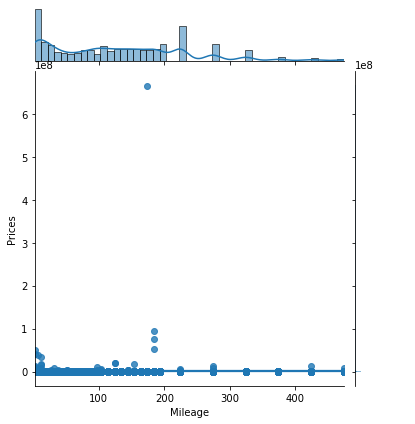

In [432]:
sns.jointplot(y="Prices", x="Mileage", data=data_famous_work, kind='reg');

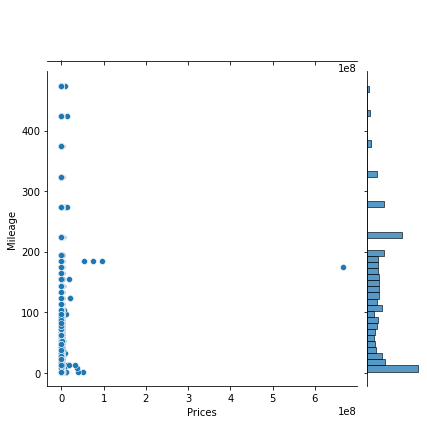

In [433]:
sns.jointplot(x="Prices", y="Mileage", data=data_famous_work, kind='scatter');

In [571]:
####spliting data#####
data_famous_ = data_famous_work[data_famous_work['Prices'] < 1e5]

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)

x= data_famous_[["Mileage","Modeles","Etat","Année_Service","Diesel/Essence","Villes","Boite vitesse"]]

x = poly.fit_transform(x)

y= data_famous_[["Prices"]]
x.shape

(17016, 792)

<AxesSubplot:xlabel='Prices', ylabel='Count'>

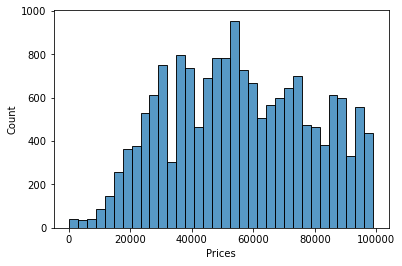

In [445]:
sns.histplot(data=data_famous_, x="Prices")

<AxesSubplot:xlabel='Mileage', ylabel='Prices'>

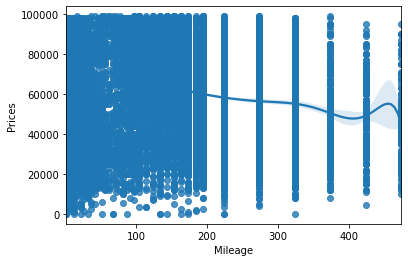

In [267]:
sns.regplot(data=data_famous_, x="Mileage", y="Prices", order=10)

In [572]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                                random_state=100)

In [482]:
from xgboost import XGBRegressor

In [489]:
xg_reg= XGBRegressor(n_estimators=100, max_depth=6)

In [490]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [491]:
y_pred = xg_reg.predict(x_test)

In [492]:
metrics.r2_score(y_test,y_pred)

0.6823574034754719

In [493]:
y_pred

array([63649.11 , 41261.246, 79369.734, ..., 43091.977, 49847.227,
       64835.277], dtype=float32)

In [494]:
mse = mean_squared_error(y_test,y_pred)

In [495]:
print(mse)

170917653.71144313


In [496]:
rmse = np.sqrt(mse)

In [497]:
print(rmse)

13073.547862437461


In [498]:
#model = XGBRegressor(objective= "reg:squarederror")

In [500]:
#scores = cross_val_score(model,x,y,
 #                         scoring="neg_mean_squared_error",
   #                       cv=10)

In [ ]:
#scores

In [ ]:
#rmse = np.sqrt(-scores)

In [ ]:
#print(rmse)

In [544]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(n_estimators = 50,max_depth=10, random_state=0)
regr.fit(x_train,y_train)

<ipython-input-544-ee00c9349d45>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


RandomForestRegressor(max_depth=10, n_estimators=50, random_state=0)

In [545]:
metrics.r2_score(y_test,y_pred)

0.5919400210083983

In [503]:
regr.score(x_test,y_test)

0.6529573252207888

In [510]:
from sklearn.model_selection import GridSearchCV

In [546]:
param_grid = [    
    {'max_depth' : [1,50],
    'n_estimators' : [1,100]
    }
]
#la max_depth c'était [3-20]

In [547]:
clf = GridSearchCV(xg_reg, param_grid = param_grid, cv=10,verbose=True)

In [548]:
best_clf = clf.fit(x_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [549]:
best_clf.best_score_
#0.6884209870175859 first attempt wiith 'max_depth' : [2,20]
#0.6948349050589604 second attempt with 'max_depth' : [4,20]
#0.693530856147601 third attempt with  'max_depth' : [5,20]
#0.6456309595086351 fourth attempt with 'max_depth' : [1,20]
#0.6436234957840063 fith attempt with 'max_depth' : [1,50]

0.6436234957840063

In [568]:
########third part with regression simple#################
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
r2_ = metrics.r2_score(y_test, y_pred)
print(r2_*100,'%')

59.194002100839825 %


In [569]:
from sklearn import linear_model
ransac = linear_model.RANSACRegressor()
ransac.fit(x_train,y_train)
y_predd = ransac.predict(x_test)
r2_2 = metrics.r2_score(y_test, y_pred)
print(r2_2*100,'%')

59.194002100839825 %


In [461]:
#############second part############
#x=data_famous_work[["cool","Mileage"]]
#y=data_famous_work["Prices"]
#x["cool"] = x["cool"].replace({'--': 0, 'Plus de 41 ': 42}).astype(int)

In [1]:
#lol = [[134,2180,168,29,1,8,119,2]]
#regressor.predict(lol)

#j'ai essayer de faire une prediction avec ça mais ça n'a pas marcher il sort cette erreur